head:    Force  Velocity  Acceleration  Error  Score  Scoree
0  0.357    90.958       0.59719  44.25     12       0
1  0.357    97.090       0.62656  43.65     13       0
2  0.357   115.486       0.70488  43.20     15       0
3  0.357   105.266       0.65593  43.45     14       0
4  0.357    86.870       0.59719  44.25     12       0 
Shape: (155, 6)
[[ 7  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  6  3]
 [ 0  0  0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.86      0.67      0.75         9
           4       0.81      1.00      0.90        13

    accuracy                           0.87        31
   macro avg       0.73      0.73      0.73        31
weighted avg       0.85      0.87      0.85        31



D:\Program Files\Python38\Lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program Files\Python38\Lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program Files\Python38\Lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


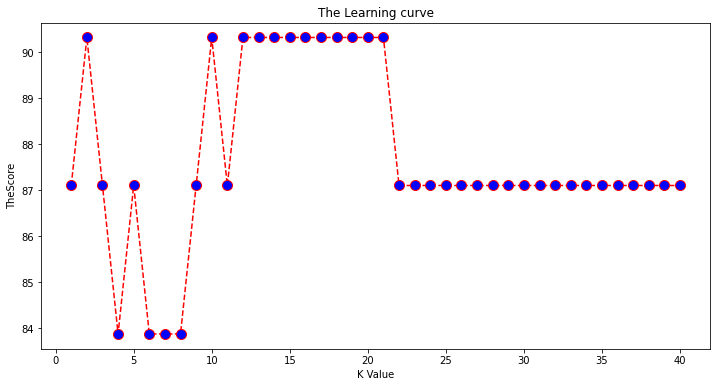

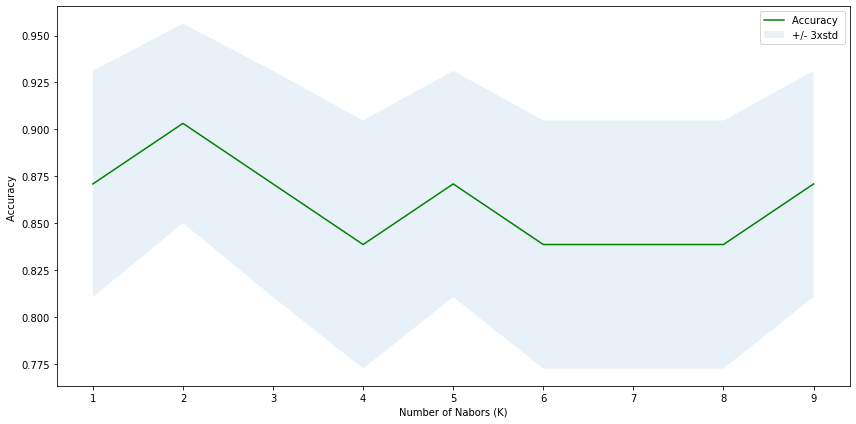

The best accuracy was with 0.9032258064516129 with k= 2


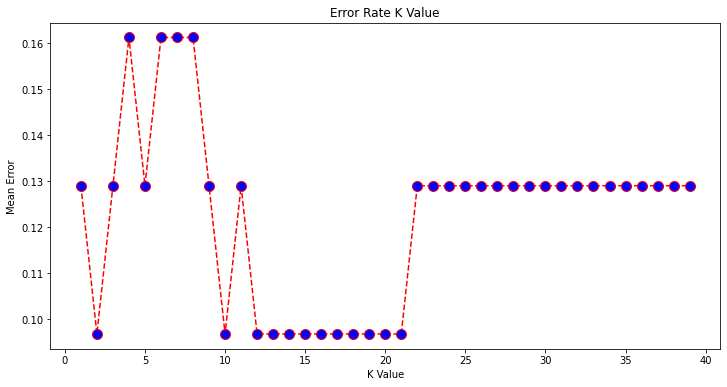

Confusion matrix, without normalization
[[0 4]
 [0 6]]
              precision    recall  f1-score   support

           0       0.46      1.00      0.63         6
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         5
           4       0.85      1.00      0.92        22

    accuracy                           0.72        39
   macro avg       0.26      0.40      0.31        39
weighted avg       0.55      0.72      0.61        39

LogLoss: : 0.95

Naive Bayes Gaussian Algorithms

Confusion Matrix
____________________
     Predicted
     pos neg
pos: 22 13
neg: 22 13


D:\Program Files\Python38\Lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program Files\Python38\Lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program Files\Python38\Lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[ 6  1  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  1 17]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         1
           3       0.80      1.00      0.89         4
           4       1.00      0.94      0.97        18

    accuracy                           0.94        31
   macro avg       0.86      0.96      0.89        31
weighted avg       0.96      0.94      0.94        31

Accuracy of SVM using optimized parameters  87.09677419354838
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       0.25      0.50      0.33         2
           4       0.95      0.87      0.91        23

    accuracy          

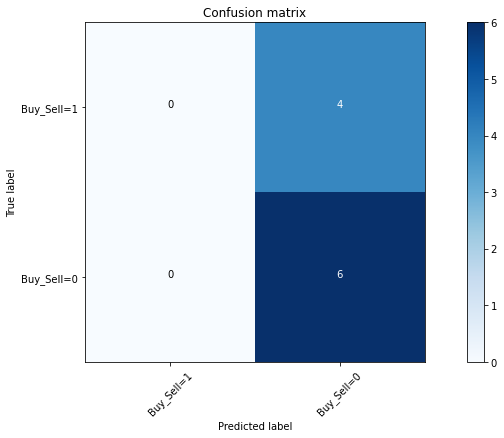

In [1]:
import numpy as np
import pandas as pd
# 导入需要的包
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split

raw_data = pd.read_csv(r"Rawdata.csv")
new_raw_data = raw_data.iloc[:, :]
print('head:', new_raw_data.head(), '\nShape:', new_raw_data.shape)

########KNN
#数据预处理
X = new_raw_data[['Force', 'Velocity', 'Acceleration', 'Error']].values
y = new_raw_data['Scoree']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
#数据标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#模型训练与预测
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#模型评价
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#绘制学习曲线
from sklearn.metrics import accuracy_score
score = []
for K in range(40):
    K_value = K + 1
    knn = KNeighborsClassifier(n_neighbors=K_value, weights='uniform', algorithm='auto')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score.append(round(accuracy_score(y_test, y_pred) * 100, 2))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), score, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('The Learning curve')
plt.xlabel('K Value')
plt.ylabel('TheScore')
plt.show()
#带误差线的学习曲线
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))
ConfustionMx = [];
for n in range(1, Ks):
    # 模型训练和预测
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n - 1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n - 1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])
# 绘图
plt.figure(figsize=(12, 6))
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with",mean_acc.max(), "with k=",mean_acc.argmax() + 1)
#误差率可视化
error = []
# 计算K值在1-40之间多误差值
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

########逻辑回归
#数据准备,定义x、y，数据标准化、划分训练集和测试集
X = np.asarray(new_raw_data[['Force', 'Velocity', 'Acceleration', 'Error']])
y = np.asarray(new_raw_data['Scoree'])
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# 模型训练
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
# predict_proba是所有类的估计值的返回，按类的标签排序。
# 第1列是第1类P(Y=1|X)的概率，第二列是第0类P(Y=0|X)的概率
yhat_prob = LR.predict_proba(X_test)
#模型评价 jaccard_score
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, average='micro')
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1, 0])
np.set_printoptions(precision=2)
plt.figure(figsize=(12, 6))
plot_confusion_matrix(cnf_matrix,
                          classes=['Buy_Sell=1', 'Buy_Sell=0'],
                          normalize=False,
                          title='Confusion matrix')
print (classification_report(y_test, yhat))
from sklearn import metrics
#对数损失
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

########朴素贝叶斯
X = new_raw_data[['Force', 'Velocity', 'Acceleration', 'Error']].values
y = new_raw_data['Scoree'].values
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
model = GaussianNB()
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.50, random_state=None)
sss.get_n_splits(X, y)
cm_sum = np.zeros((5,5))
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_sum = cm_sum + cm
print('\nNaive Bayes Gaussian Algorithms')
print('\nConfusion Matrix')
print('_'*20)
print('     Predicted')
print('     pos neg')
print('pos: %i %i' % (cm_sum[1,1], cm_sum[0,1]))
print('neg: %i %i' % (cm_sum[1,1], cm_sum[0,1]))

########决策树
X = new_raw_data[['Force', 'Velocity', 'Acceleration', 'Error']].values
y = new_raw_data['Scoree']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#######支持向量
X = new_raw_data[['Force', 'Velocity', 'Acceleration', 'Error']].values
y = new_raw_data['Scoree']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
from sklearn.svm import SVC # "Support Vector Classifier"
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
model = SVC(kernel = 'rbf', C = 1000,gamma=0.001)
model.fit(X_train, y_train)
svc_predictions = model.predict(X_test)
print("Accuracy of SVM using optimized parameters ", accuracy_score(y_test,svc_predictions)*100)
print("Report : ", classification_report(y_test,svc_predictions))
print("Score : ",model.score(X_test, y_test))
